#*Chapter 3.2 Complex processing and Visualisation of the Imagery, Valid Pixel*

#**Chapter 3.2 Valid Pixel**

In [ ]:
#import libraries 
import os
import argparse
from glob import iglob
from os.path import join
from pathlib import Path
import warnings
import xarray as xr
import pandas as pd
import numpy as np
import h5py
import harp #satellite data reading
import netCDF4 as nc4 #read NetCDF
from netCDF4 import Dataset #read NetCDF
import numpy as np
from termcolor import colored
from matplotlib import pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

##**Data Reading, Extraction and Visual**

Reference:
The model script was adopted from the following webpage:

https://nirdeshthekumar.medium.com/monitoring-air-pollution-with-satellite-data-using-sentinel-5-p-in-python-2bbc6e1acef4

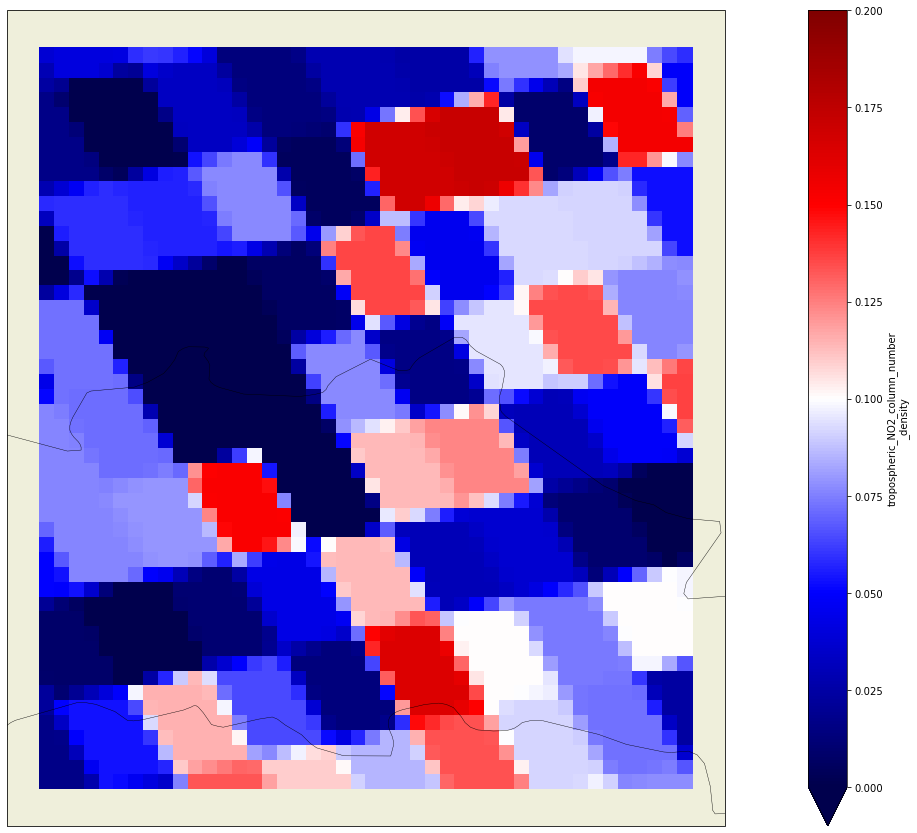

In [ ]:
file=xr.open_dataset('/Users/emmaminasyan/Sentinel5P/Data/crop/Berlin/L2__NO2___/S5P_OFFL_L3__NO2____20190105T103028_20190105T121158_06371_01_010202_20190111T123342.nc') #NetCDF daily file read

no2=file['tropospheric_NO2_column_number_density']*17**3

fig=plt.figure(figsize=(30,15)) # create a figure frame and set up the figure size
ax = plt.axes(projection=ccrs.PlateCarree()) # Creates an empty subplot 
#
#extent = [12,12.5,52,52.5]
extent = [100,300,20,40] #geographic bounderies
#extent = [11.788330,14.743408,51.738935,53]
#extent = [100,300,20,40]

#Plot Lon/lat

#https://nirdeshthekumar.medium.com/monitoring-air-pollution-with-satellite-data-using-sentinel-5-p-in-python-2bbc6e1acef4

no2[0].plot.pcolormesh(ax=ax, x='longitude', y='latitude', \
                          add_colorbar=True, cmap='seismic', \
                           transform=ccrs.PlateCarree(),vmin=0,vmax=0.2) 


state_provinces = cf.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', 
                                            scale='10m', facecolor='none')

ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(state_provinces, linewidth=0.4, edgecolor='black')


In [ ]:
file_i1= '/Users/emmaminasyan/Downloads/S5P_OFFL_L2__NO2____20220201T111637_20220201T125807_22304_02_020301_20220203T033158.nc.incomplete'

In [ ]:
grp = "PRODUCT" #group name 
var_name = 'nitrogendioxide_tropospheric_column' #variable name for colourcoding

In [ ]:
FIn = xr.open_dataset(file_i1, group = "PRODUCT"); #incorporate group
FIn

<xarray.Dataset>
Dimensions:                                               (scanline: 4173,
                                                           ground_pixel: 450,
                                                           time: 1, corner: 4,
                                                           polynomial_exponents: 6,
                                                           intensity_offset_polynomial_exponents: 1,
                                                           layer: 34,
                                                           vertices: 2)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  * corner                                                (corner) float64 0....
  * polynomial_exponents                                  (polynomial_exponents) float64 ...
  * intensity_offset_polynomial_exponents                 (intensity_offset_polynomial_exponents) float64 ...
  * layer                                                 (layer) float64 0.0...
  * vertices                                              (vertices) float64 ...
    latitude                                              (time, scanline, ground_pixel) float32 ...
    longitude                                             (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                                            (time, scanline) datetime64[ns] ...
    time_utc                                              (time, scanline) object ...
    qa_value                                              (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column                   (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision         (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision_kernel  (time, scanline, ground_pixel) float32 ...
    averaging_kernel                                      (time, scanline, ground_pixel, layer) float32 ...
    air_mass_factor_troposphere                           (time, scanline, ground_pixel) float32 ...
    air_mass_factor_total                                 (time, scanline, ground_pixel) float32 ...
    tm5_tropopause_layer_index                            (time, scanline, ground_pixel) float64 ...
    tm5_constant_a                                        (layer, vertices) float32 ...
    tm5_constant_b                                        (layer, vertices) float32 ...

In [ ]:
print(FIn.data_vars) #the names of the variables  in NetCDF

Data variables:
    delta_time                                            (time, scanline) datetime64[ns] ...
    time_utc                                              (time, scanline) object ...
    qa_value                                              (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column                   (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision         (time, scanline, ground_pixel) float32 ...
    nitrogendioxide_tropospheric_column_precision_kernel  (time, scanline, ground_pixel) float32 ...
    averaging_kernel                                      (time, scanline, ground_pixel, layer) float32 ...
    air_mass_factor_troposphere                           (time, scanline, ground_pixel) float32 ...
    air_mass_factor_total                                 (time, scanline, ground_pixel) float32 ...
    tm5_tropopause_layer_index                            (time, scanline, ground_pixel) f

In [ ]:
#chech the inside of the NO2 variable 
print(FIn.coords)
VarTime=FIn.time.values
date=VarTime.astype('datetime64[D]')
Lon=FIn['longitude']
Lat=FIn['latitude']
VarNO2=FIn['nitrogendioxide_tropospheric_column']
FIn.close()
print(VarNO2)

Coordinates:
  * scanline                               (scanline) float64 0.0 ... 4.172e+03
  * ground_pixel                           (ground_pixel) float64 0.0 ... 449.0
  * time                                   (time) datetime64[ns] 2022-02-01
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * polynomial_exponents                   (polynomial_exponents) float64 0.0...
  * intensity_offset_polynomial_exponents  (intensity_offset_polynomial_exponents) float64 ...
  * layer                                  (layer) float64 0.0 1.0 ... 32.0 33.0
  * vertices                               (vertices) float64 0.0 1.0
    latitude                               (time, scanline, ground_pixel) float32 ...
    longitude                              (time, scanline, ground_pixel) float32 ...
<xarray.DataArray 'nitrogendioxide_tropospheric_column' (time: 1,
                                                         scanline: 4173,
                                     

In [ ]:
VarNO2[0] #munltidimensional

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 4173,
                                                         ground_pixel: 450)>
[1877850 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2022-02-01
    latitude      (scanline, ground_pixel) float32 -61.12 -61.13 ... 85.84 85.77
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

##**Visual with Coastlines and Rivers**

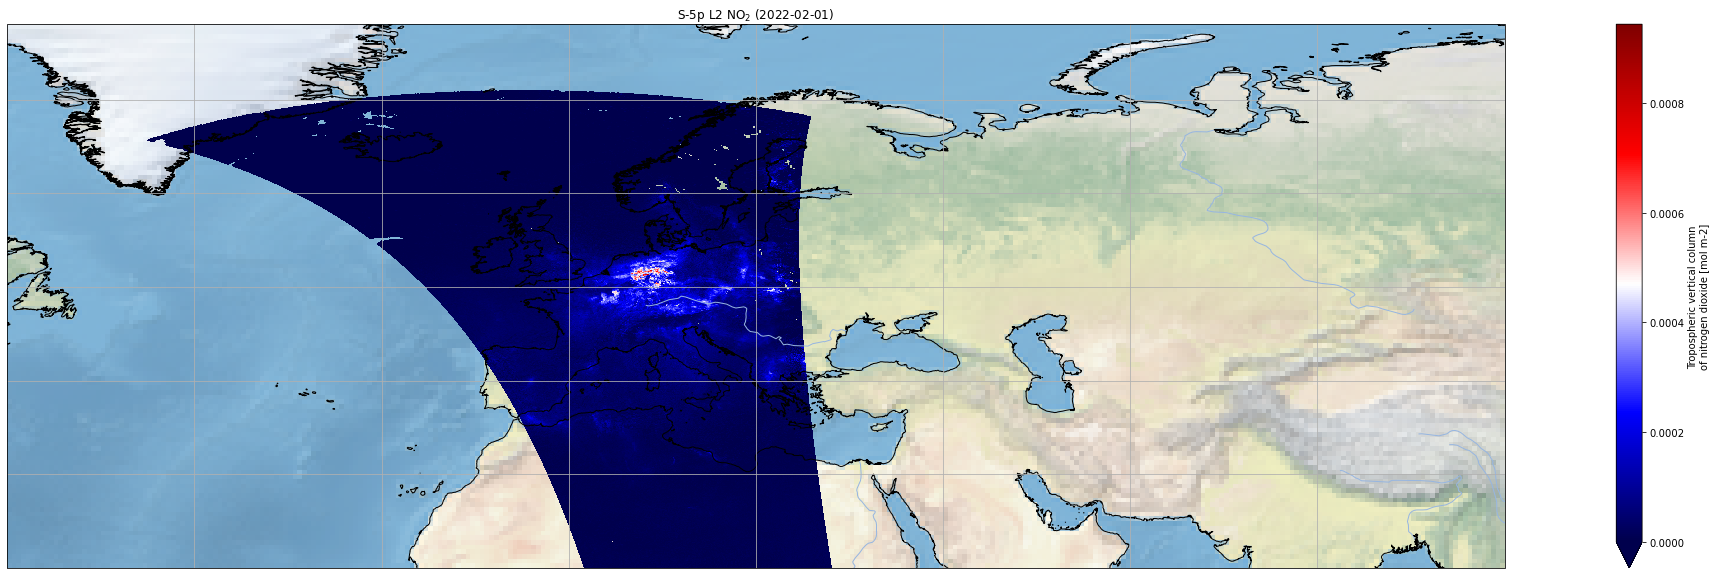

In [ ]:
#https://nirdeshthekumar.medium.com/monitoring-air-pollution-with-satellite-data-using-sentinel-5-p-in-python-2bbc6e1acef4

fig=plt.figure(figsize=(40,10)) # create a figure frame and set up the figure size
ax = plt.axes(projection=ccrs.PlateCarree()) # Creates an empty subplot 
# Plot VarNO2 where we remove the time dimension `VarNO2[0]`
#extent = [100,300,20,40]
VarNO2[0].plot.pcolormesh(ax=ax, x='longitude', y='latitude', \
                          add_colorbar=True, cmap='seismic', \
                           transform=ccrs.PlateCarree(), vmin=0) 

ax.set_extent(extent)
ax.add_feature(cartopy.feature.RIVERS) # add river
ax.set_title('S-5p L2 NO$_2$ ({}) '.format(str(date[0]))) # add title
ax.coastlines('10m')  # add coastline
ax.stock_img() # add the color of earth
ax.gridlines()  # add grid line
fig.savefig('/Users/emmaminasyan/' + str(date[0]))  
